# Acknowledgements

- w3schools.com for pandas, matplotlib, numpy docs reference
- chatGPT "How to filter DataFrame rows through conditional statements"

# Introduction
In this Jupyter notebook, I will be exploring data regarding stars and planes through the Milky Way. I am going to load the data below.

In [ ]:
import pandas as pd
import numpy as np

df = pd.read_csv('exoplanets.csv')
df

,pl_name,hostname,default_flag,sy_snum,sy_pnum,discoverymethod,disc_year,disc_facility,soltype,pl_controv_flag,...,ra,decstr,dec,sy_dist,sy_vmag,sy_kmag,sy_gaiamag,rowupdate,pl_pubdate,releasedate
0,11 Com b,11 Com,0,2,1,Radial Velocity,2007,Xinglong Station,Published Confirmed,0,...,185.178779,+17d47m35.71s,17.793252,93.1846,4.72307,2.282,4.44038,2014-07-23,2011-08,2014-07-23
1,11 Com b,11 Com,0,2,1,Radial Velocity,2007,Xinglong Station,Published Confirmed,0,...,185.178779,+17d47m35.71s,17.793252,93.1846,4.72307,2.282,4.44038,2014-05-14,2008-01,2014-05-14
2,11 Com b,11 Com,1,2,1,Radial Velocity,2007,Xinglong Station,Published Confirmed,0,...,185.178779,+17d47m35.71s,17.793252,93.1846,4.72307,2.282,4.44038,2023-09-19,2023-08,2023-09-19
3,11 UMi b,11 UMi,1,1,1,Radial Velocity,2009,Thueringer Landessternwarte Tautenburg,Published Confirmed,0,...,229.274595,+71d49m26.19s,71.823943,125.3210,5.01300,1.939,4.56216,2018-09-04,2017-03,2018-09-06
4,11 UMi b,11 UMi,0,1,1,Radial Velocity,2009,Thueringer Landessternwarte Tautenburg,Published Confirmed,0,...,229.274595,+71d49m26.19s,71.823943,125.3210,5.01300,1.939,4.56216,2018-04-25,2011-08,2014-07-23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35916,ups And d,ups And,0,2,3,Radial Velocity,1999,Multiple Observatories,Published Confirmed,0,...,24.198353,+41d24m13.73s,41.403815,13.4054,4.09565,2.859,3.98687,2014-08-21,2004-01,2014-08-21
35917,ups Leo b,ups Leo,1,1,1,Radial Velocity,2021,Okayama Astrophysical Observatory,Published Confirmed,0,...,174.237219,-00d49m24.83s,-0.823564,52.5973,4.30490,2.184,4.03040,2022-01-10,2021-12,2022-01-10
35918,xi Aql b,xi Aql,0,1,1,Radial Velocity,2007,Okayama Astrophysical Observatory,Published Confirmed,0,...,298.562449,+08d27m39.98s,8.461105,56.1858,4.70964,2.171,4.42501,2014-07-23,2011-08,2014-07-23
35919,xi Aql b,xi Aql,0,1,1,Radial Velocity,2007,Okayama Astrophysical Observatory,Published Confirmed,0,...,298.562449,+08d27m39.98s,8.461105,56.1858,4.70964,2.171,4.42501,2014-05-14,2008-06,2014-05-14


# Capped Masses

In [ ]:
cap_masses_condition = lambda x: 500 if x > 500 else x

def cap_masses(df):
  """
  Adds a column to a DataFrame called 'cap_masses' where the value is 500
  if the planet mass is over 500, else the masses is copied
  It mutates the DataFrame, it does not return anything

  Params:
    df - pandas DataFrame containing a 'pl_bmasse' column.
  """
  pl_bmasses_srs = df['pl_bmasse']
  pl_bmasses_np_arr = pl_bmasses_srs.array.to_numpy()
  cap_masses_np_arr = np.array(list(map(cap_masses_condition, pl_bmasses_srs)))
  cap_masses_srs = pd.Series(cap_masses_np_arr)
  df.insert(len(df.columns), 'capped_mass', cap_masses_srs)

cap_masses(df)

# Plotting a map of the Milky Way

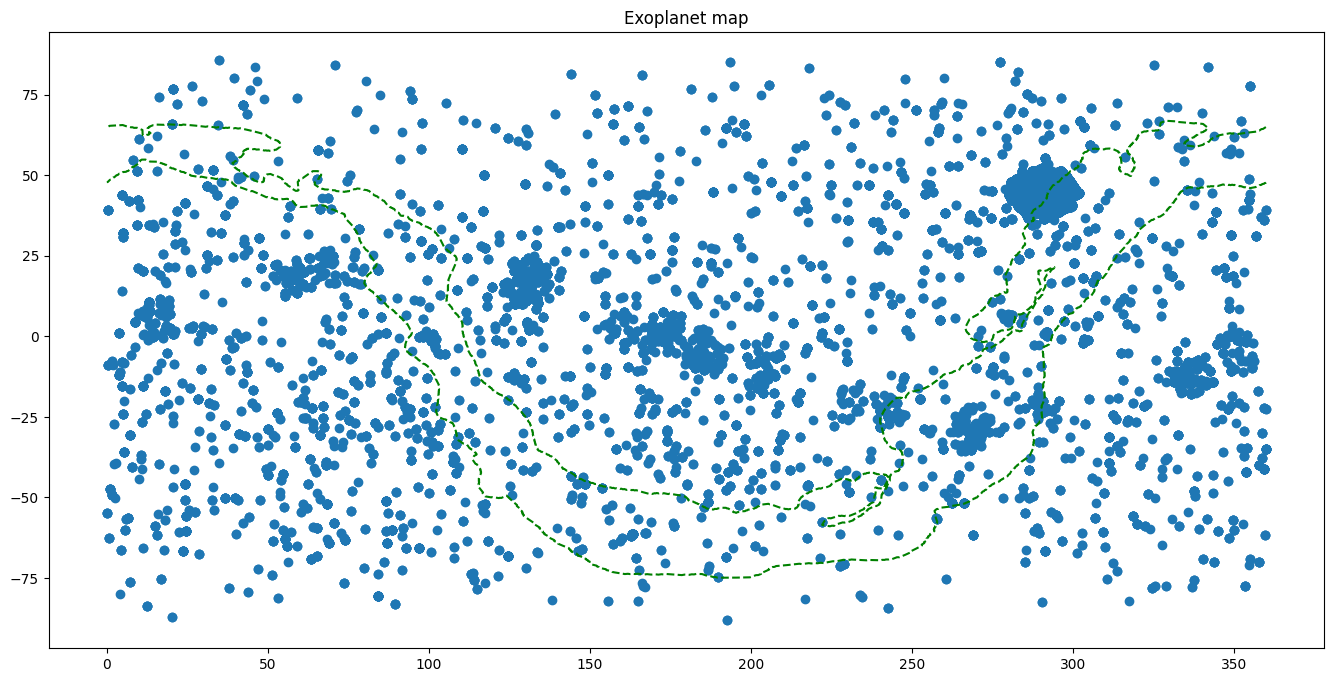

In [ ]:
import matplotlib.pyplot as plt
import json

def overall_map(df):
  """
  It reads the milky_way.json file stored in local directory.
  It plots all the stars in orange and the outline of the milky way in green.

  Params:
    pd (pd.DataFrame) - the exoplanets DataFrame
  """
  with open('milky_way.json') as f:
    a = json.load(f)

    xs1, ys1 = [], []
    xs2, ys2 = [], []
    for coords_pair in a[0]:
      xs1.append(coords_pair[0])
      ys1.append(coords_pair[1])
    for coords_pair in a[1]:
      xs2.append(coords_pair[0])
      ys2.append(coords_pair[1])

    fig, ax = plt.subplots(figsize=(20, 8))
    plt.title('Exoplanet map')

    ax.plot(xs1,ys1, color='green', linestyle='dashed')
    ax.plot(xs2,ys2, color='green', linestyle='dashed')
    ax.scatter(df['ra'], df['dec'])
    ax.set_aspect('equal', adjustable='box')

    plt.show()


overall_map(df)

# Systems dataframe

I am going to write a function which returns a system DataFrame containing the columns `name`, `number of stars` and `number of planets`

In [ ]:
def analyse_systems(df):
  """
  Returns a pandas DataFrame containing the columns name,
  number of stars and number of planets of different solar systems.
  The DataFrame is sorted in descending order of number of stars.

  Params:
    df (pd.DataFrame) - Exoplanets DataFrame

  Returns:
    systems (pd.DataFrame) - DataFrame containing information mentioned above.
  """
  hostname_group = df.groupby(['hostname']).groups

  hostname_index_list = []

  for value in hostname_group.values():
    hostname_index_list.append(value[0])

  systems = df.loc[hostname_index_list, ["hostname","sy_snum","sy_pnum"]]
  systems = systems.rename(columns={"hostname":"name","sy_snum":"number of stars","sy_pnum":"number of planets"})
  systems = systems.sort_values(by='number of stars', ascending=False)
  systems = systems.reset_index(drop=True)
  return systems

systems = analyse_systems(df)

# Facilities dataframe

In [ ]:
def analyse_facilities(df):
  """
  Returns a DataFrame centered around the facilites which discover the planets
  and stars with data about them.
  The data returned is
  number of things star/planets dicovered -> count
  max_ra -> maximum right ascension
  max_dec -> maximum declination
  min_ra -> minimum right ascension
  min_dec -> minimum declination
  ra_range -> right ascension range
  dec_range -> declination range
  colour -> a colour associated with the facility.
  """
  df2 = df[df.disc_facility != 'Multiple Observatories']
  df2 = df2[df2.disc_facility != 'Multiple Facilities']

  facilities_df = df2.groupby(['disc_facility'])[['disc_facility']].count()

  disc_facility_max_ra_np = df2.groupby(['disc_facility'])[['ra']].max()['ra'].to_numpy()
  disc_facility_min_ra_np = df2.groupby(['disc_facility'])[['ra']].min()['ra'].to_numpy()
  disc_facility_max_dec_np = df2.groupby(['disc_facility'])[['dec']].max()['dec'].to_numpy()
  disc_facility_min_dec_np = df2.groupby(['disc_facility'])[['dec']].min()['dec'].to_numpy()

  range_ra_numpy = disc_facility_max_ra_np - disc_facility_min_ra_np
  range_dec_numpy = disc_facility_max_dec_np - disc_facility_min_dec_np

  colours_list = [ '#e6194b', '#3cb44b', '#ffe119', '#4363d8', '#f58231',
 '#911eb4', '#46f0f0', '#f032e6', '#bcf60c', '#fabebe',
 '#008080', '#e6beff', '#9a6324', '#fffac8', '#800000',
 '#aaffc3', '#808000', '#ffd8b1', '#000075']

  for i in range(0, len(disc_facility_max_ra_np) - len(colours_list)):
    colours_list.append('#808080')

  facilities_df['max_ra'] = disc_facility_max_ra_np
  facilities_df['min_ra'] = disc_facility_min_ra_np
  facilities_df['max_dec'] = disc_facility_max_dec_np
  facilities_df['min_dec'] = disc_facility_min_dec_np
  facilities_df['ra_range'] = range_ra_numpy
  facilities_df['dec_range'] = range_dec_numpy
  facilities_df['colour'] = colours_list

  facilities_df = facilities_df.rename(columns={'disc_facility':'count'})
  facilities_df = facilities_df.sort_values(by=['count'], ascending=False)
  facilities_df = facilities_df.reset_index()

  return facilities_df

analyse_facilities(df)

,disc_facility,count,max_ra,min_ra,max_dec,min_dec,ra_range,dec_range,colour
0,Kepler,26782,301.720777,280.206628,52.149105,36.577344,21.514150,15.571761,#808080
1,K2,1970,356.226015,8.740149,25.038082,-28.710584,347.485866,53.748666,#808080
2,Transiting Exoplanet Survey Satellite (TESS),1109,359.793385,0.185606,85.129495,-88.121111,359.607779,173.250606,#808080
3,SuperWASP,941,359.900874,0.325761,55.473027,-64.027039,359.575113,119.500066,#808080
4,W. M. Keck Observatory,636,359.974984,4.612668,83.587427,-53.741285,355.362316,137.328712,#808080
...,...,...,...,...,...,...,...,...,...
64,KOINet,1,292.873370,292.873370,42.966158,42.966158,0.000000,0.000000,#808080
65,Teide Observatory,1,241.475265,241.475265,-18.312417,-18.312417,0.000000,0.000000,#808080
66,SPECULOOS Southern Observatory,1,64.130910,64.130910,-28.315791,-28.315791,0.000000,0.000000,#808080
67,South African Radio Astronomy Observatory (SAR,1,255.307450,255.307450,-30.106983,-30.106983,0.000000,0.000000,#808080


# Show Isolation

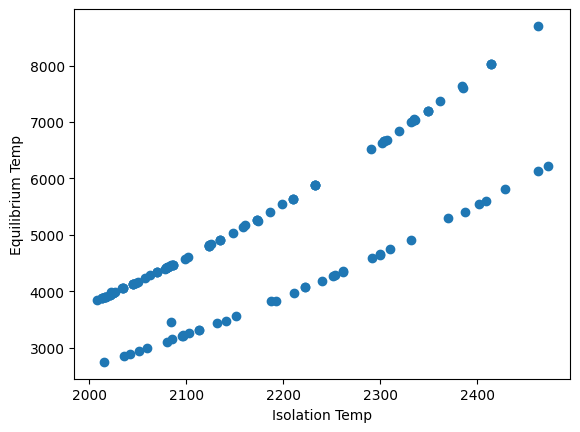

In [ ]:
import matplotlib.pyplot as plt

def show_isolation(df):
  """
  Creates a  new Dataframe with clean data with the columns equilibrium temperature,
  isolation. The restriction of the equilibrium temperature is between 2000 and 2500.
  It plots equilibrium temperature against isolation.

  Params:
    df (pd.DataFrame) - original pandas exoplanets dataframe
  """
  df0 = df.filter(['pl_eqt', 'pl_insol', 'colour'])
  df0 = df0.dropna()
  df0 = df0[(df0['pl_eqt'] >= 2000) & (df0['pl_eqt'] <= 2500)]
  df0 = df0.reset_index(drop=True)

  plt.scatter(df0['pl_eqt'], df0['pl_insol'])
  plt.xlabel('Isolation Temp')
  plt.ylabel('Equilibrium Temp')

  plt.show()

show_isolation(df)